#Actividad: Problemas de regresión
Joel Isaias Solano Ocampo | A01639289



---


##Problema 1:
El conjunto de datos de criminalidad de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

* VR = crímenes violentos por cada 100000 habitantes
* MR = asesinatos por cada 100000 habitantes
* M = porcentaje de áreas metropolitanas
* W = porcentaje de gente blanca
* H = porcentaje de personas con preparatoria terminada
* P = porcentaje con ingresos por debajo del nivel de pobreza
* S = porcentaje de familias con solo un miembro adulto como tutor

0. Importamos librerias:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score, train_test_split, LeaveOneOut

0. Importamos los datos del problema en un DataFrame:

In [ ]:
df = pd.read_csv('/content/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

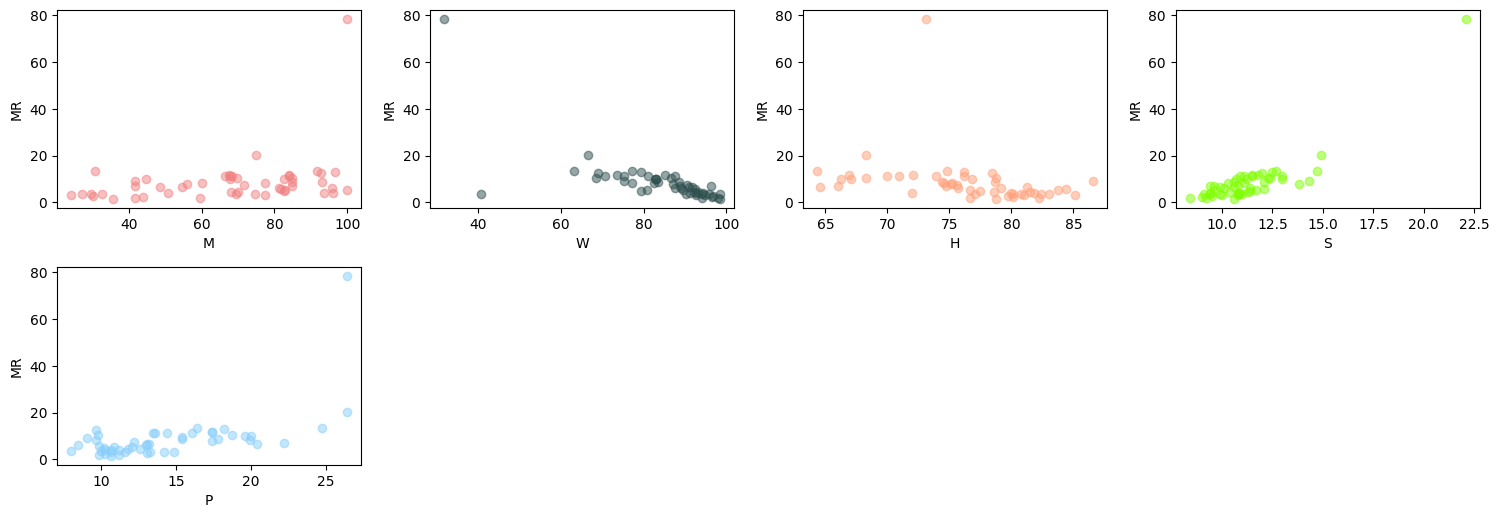

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 4, 1)
plt.scatter(df['M'], df['MR'], color='#F08080', alpha=0.5)
plt.xlabel('M')
plt.ylabel('MR')

plt.subplot(4, 4, 2)
plt.scatter(df['W'], df['MR'], color='#2F4F4F', alpha=0.5)
plt.xlabel('W')
plt.ylabel('MR')

plt.subplot(4, 4, 3)
plt.scatter(df['H'], df['MR'], color='#FFA07A', alpha=0.5)
plt.xlabel('H')
plt.ylabel('MR')

plt.subplot(4, 4, 4)
plt.scatter(df['S'], df['MR'], color='#7FFF00', alpha=0.5)
plt.xlabel('S')
plt.ylabel('MR')

plt.subplot(4, 4, 5)
plt.scatter(df['P'], df['MR'], color='#87CEFA', alpha=0.5)
plt.xlabel('P')
plt.ylabel('MR')

plt.tight_layout()
plt.show()

2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [ ]:
X = np.array(df[['M', 'W', 'H', 'S', 'P']])
Y = np.array(df['MR'])
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Coef. modelo de regresion:", coefficients)
y_pred = X @ coefficients

Coef. modelo de regresion: [-33.73141336   0.05104714  -0.195887     0.1995895    2.82467971
   0.58140297]


3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mseVc = []
maeVc = []
r2Vc = []
for train_idx, test_idx in kf.split(X):
  x_train = X[train_idx, :]
  y_train = Y[train_idx]
  regrVc = linear_model.LinearRegression()
  regrVc.fit(x_train, y_train)
  x_test = X[test_idx, :]
  y_test = Y[test_idx]
  y_pred = regrVc.predict(x_test)
  mse_i = mean_squared_error(y_test, y_pred)
  mseVc.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  maeVc.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2Vc.append(r2_i)
print('MSE:', np.average(mseVc), ' MAE:', np.average(maeVc),' R^2:', np.average(r2Vc))

MSE: 67.83778241617378  MAE: 4.436796742091727  R^2: -1.207915214028994


4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def loocv(X, Y):
    n = X.shape[0]
    mse_scores = []
    mae_scores = []
    for i in range(n):
        X_train = np.delete(X, i, axis=0)
        Y_train = np.delete(Y, i)
        X_test = X[i].reshape(1, -1)
        Y_test = Y[i]
        coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        y_pred = X_test @ coefficients
        mse_scores.append(mse(Y_test, y_pred))
        mae_scores.append(mae(Y_test, y_pred))
    return mse_scores, mae_scores

mse_scores, mae_scores = loocv(X, Y)

In [ ]:
def remove_utopic_scores(lst, lim):
  for num in lst:
    if num >= lim:
      lst.remove(num)
  return lst

mse_scores = remove_utopic_scores(mse_scores, 50)
mae_scores = remove_utopic_scores(mae_scores, 10)
print(mae_scores)

[0.3708155641426423, 3.145622227132103, 3.7256403170101606, 4.129794436838454, 3.65452499497954, 3.6266732867556284, 3.7673744994456175, 1.0315286873160137, 3.712780624831092, 5.679573712820875, 4.053696166213287, 1.146877209307016, 2.7575698453822906, 3.5976652665367777, 1.339721645536459, 9.561796027880117, 2.6160026593420107, 0.008108540019762245, 1.027449585136298, 5.686642173348048, 0.9113485986308283, 3.926256228155598, 1.9503715203081864, 2.9261625219549074, 6.73347327522836, 4.9364474049623634, 3.975837401773724, 1.1056938541491936, 8.971203538686026, 0.3745524755498817, 3.0187498818817, 2.241445545214761, 2.921010203529791, 2.1347153714977516, 4.128917383354568, 0.4797432775724677, 5.771744181876819, 3.219003206902643, 0.29406798406674817, 0.19096646001387185, 0.00842960713074481, 3.788884651814076, 2.628387170181002, 5.037380202642866, 0.31554615669371344, 5.816590747340495, 0.46113080087826974]


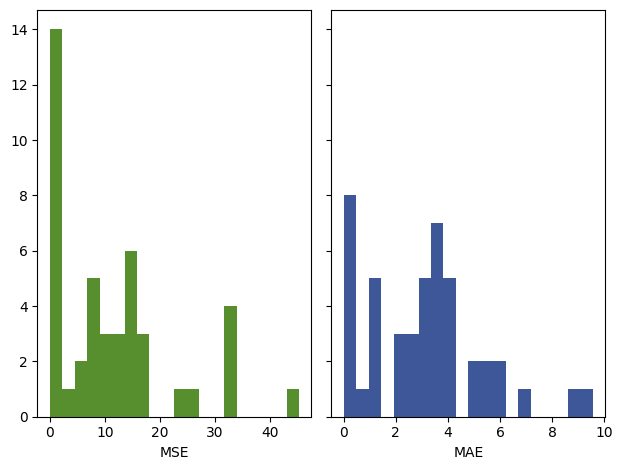

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_scores[:-1], bins=20,color='#588f2e')
axs[0].set_xlabel("MSE")
axs[1].hist(mae_scores[:-1], bins=20,color='#3d5799')
axs[1].set_xlabel("MAE")
plt.show()

5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [ ]:
pv2 = df.assign(M2 = lambda X: X['M']**2, W2 = lambda X: X['W']**2, H2 = lambda X: X['H']**2, P2 = lambda X: X['P']**2, S2 = lambda X: X['S']**2)
pv2 = pv2.assign(MW = lambda X: X['M']*X['W'], MH = lambda X: X['M']*X['H'], MP = lambda X: X['M']*X['P'], MS = lambda X: X['M']*X['S'], WH = lambda X: X['W']*X['H'], WP = lambda X: X['W']*X['P'], WS = lambda X: X['W']*X['S'], HP = lambda X: X['H']*X['P'], HS = lambda X: X['H']*X['S'], PS = lambda X: X['P']*X['S'])
print(pv2.head())

  State    VR    MR     M     W     H     P     S       M2       W2  ...  \
0    AK   761   9.0  41.8  75.2  86.6   9.1  14.3  1747.24  5655.04  ...   
1    AL   780  11.6  67.4  73.5  66.9  17.4  11.5  4542.76  5402.25  ...   
2    AR   593  10.2  44.7  82.9  66.3  20.0  10.7  1998.09  6872.41  ...   
3    AZ   715   8.6  84.7  88.6  78.7  15.4  12.1  7174.09  7849.96  ...   
4    CA  1078  13.1  96.7  79.3  76.2  18.2  12.5  9350.89  6288.49  ...   

        MW       MH       MP       MS       WH       WP       WS       HP  \
0  3143.36  3619.88   380.38   597.74  6512.32   684.32  1075.36   788.06   
1  4953.90  4509.06  1172.76   775.10  4917.15  1278.90   845.25  1164.06   
2  3705.63  2963.61   894.00   478.29  5496.27  1658.00   887.03  1326.00   
3  7504.42  6665.89  1304.38  1024.87  6972.82  1364.44  1072.06  1211.98   
4  7668.31  7368.54  1759.94  1208.75  6042.66  1443.26   991.25  1386.84   

        HS      PS  
0  1238.38  130.13  
1   769.35  200.10  
2   709.41  214.0

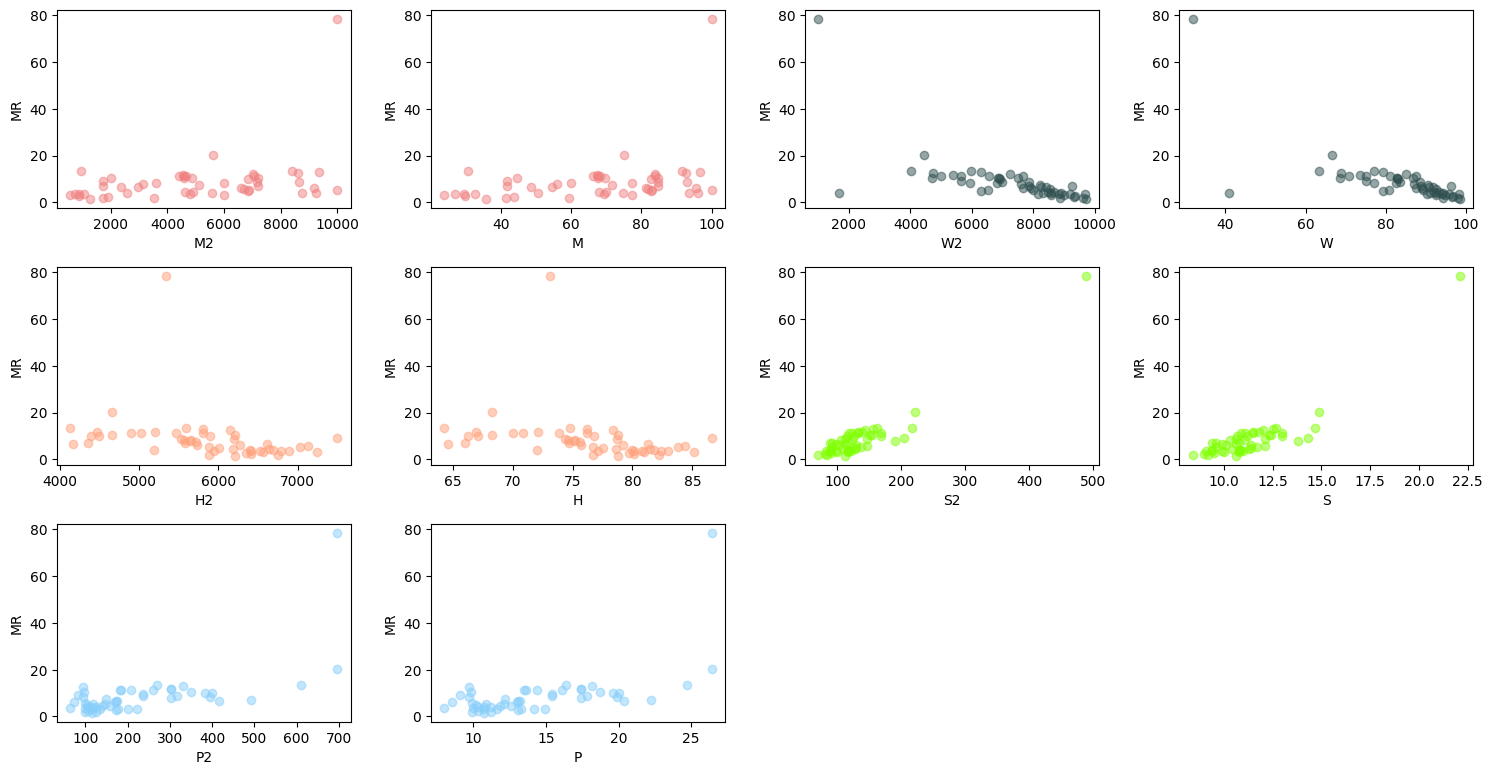

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 4, 1)
plt.scatter(pv2['M2'], pv2['MR'], color='#F08080', alpha=0.5)
plt.xlabel('M2')
plt.ylabel('MR')

plt.subplot(4, 4, 2)
plt.scatter(pv2['M'], pv2['MR'], color='#F08080', alpha=0.5)
plt.xlabel('M')
plt.ylabel('MR')

plt.subplot(4, 4, 3)
plt.scatter(pv2['W2'], pv2['MR'], color='#2F4F4F', alpha=0.5)
plt.xlabel('W2')
plt.ylabel('MR')

plt.subplot(4, 4, 4)
plt.scatter(pv2['W'], pv2['MR'], color='#2F4F4F', alpha=0.5)
plt.xlabel('W')
plt.ylabel('MR')

plt.subplot(4, 4, 5)
plt.scatter(pv2['H2'], pv2['MR'], color='#FFA07A', alpha=0.5)
plt.xlabel('H2')
plt.ylabel('MR')

plt.subplot(4, 4, 6)
plt.scatter(pv2['H'], pv2['MR'], color='#FFA07A', alpha=0.5)
plt.xlabel('H')
plt.ylabel('MR')

plt.subplot(4, 4, 7)
plt.scatter(pv2['S2'], pv2['MR'], color='#7FFF00', alpha=0.5)
plt.xlabel('S2')
plt.ylabel('MR')

plt.subplot(4, 4, 8)
plt.scatter(pv2['S'], pv2['MR'], color='#7FFF00', alpha=0.5)
plt.xlabel('S')
plt.ylabel('MR')

plt.subplot(4, 4, 9)
plt.scatter(pv2['P2'], pv2['MR'], color='#87CEFA', alpha=0.5)
plt.xlabel('P2')
plt.ylabel('MR')

plt.subplot(4, 4, 10)
plt.scatter(pv2['P'], pv2['MR'], color='#87CEFA', alpha=0.5)
plt.xlabel('P')
plt.ylabel('MR')

plt.tight_layout()
plt.show()

In [ ]:
# Paso 1:
X2 = np.array(pv2[['M', 'W', 'H', 'P', 'S', 'M2', 'W2', 'H2', 'P2', 'S2', 'MW', 'MH', 'MP', 'MS', 'WH', 'WP', 'WS', 'HP', 'HS', 'PS']])
X2 = np.c_[np.ones(X.shape[0]), X2]
Y2 = np.array(pv2['MR'])

In [ ]:
# Paso 2:
coefficients = np.linalg.inv(X2.T @ X2) @ X2.T @ Y2
y_pred = X2 @ coefficients
print("Coef. modelo de regresion:", coefficients)

Coef. modelo de regresion: [-7.28145242e+01  5.32537400e-01  8.68898589e-01  7.47046791e-01
  2.84417281e+00 -3.74745221e+00 -1.03469688e-03 -5.67137690e-04
 -1.19486218e-02 -2.46491045e-02  3.10694038e-02 -4.01212743e-03
 -5.01479536e-04 -2.93872060e-03  7.08966573e-03  1.19836691e-03
 -8.30855104e-03 -5.89796535e-02 -1.64583786e-02  1.04942783e-01
  2.80138880e-02]


In [ ]:
# Paso 3:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def loocv(X, Y):
    n = X.shape[0]
    mse_scores = []
    mae_scores = []
    for i in range(n):
        X_train = np.delete(X, i, axis=0)
        Y_train = np.delete(Y, i)
        X_test = X[i].reshape(1, -1)
        Y_test = Y[i]
        coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        y_pred = X_test @ coefficients
        mse_scores.append(mse(Y_test, y_pred))
        mae_scores.append(mae(Y_test, y_pred))
    return mse_scores, mae_scores

mse_scores, mae_scores = loocv(X2, Y2)

In [ ]:
def remove_utopic_scores(lst, lim):
  for num in lst:
    if num >= lim:
      lst.remove(num)
  return lst

mse_scores = remove_utopic_scores(mse_scores, 20)
mae_scores = remove_utopic_scores(mae_scores, 15)
print(mae_scores)

[0.5575165392865511, 3.0590604298445463, 0.380346872418313, 0.6298700082341835, 0.4474439863190467, 2.619807073942556, 3.928110195118407, 0.23897964130602922, 2.1547708986095966, 0.7985946865140479, 0.30251394008374755, 2.1529578254754096, 1.6345945323254227, 2.7990828215018215, 1.625056821299987, 3.719271775389867, 1.6706063108318774, 0.8015295373794267, 2.3198664681366963, 1.6470900393209682, 0.437652853320428, 4.150129592812295, 4.025475576484666, 0.043232961238253154, 2.473644527145968, 3.7728149739669004, 1.3862148832748544, 0.9320617855627518, 3.462074111837901, 5.043887707132873, 5.552042293955461, 0.10575785143284477, 1.7052756305721033, 1.570796377579633, 0.7882039063821313, 0.4203276256280146, 6.240938686067443, 6.397830217886746, 0.8219249011785679, 0.7126475756975772, 3.128056470118418, 0.6362540838474104, 2.3335714210424676, 3.9723878159430144, 1.7993438414105212, 1.2020979126122935, 3.7995133459465134, 1.1419526209314852]


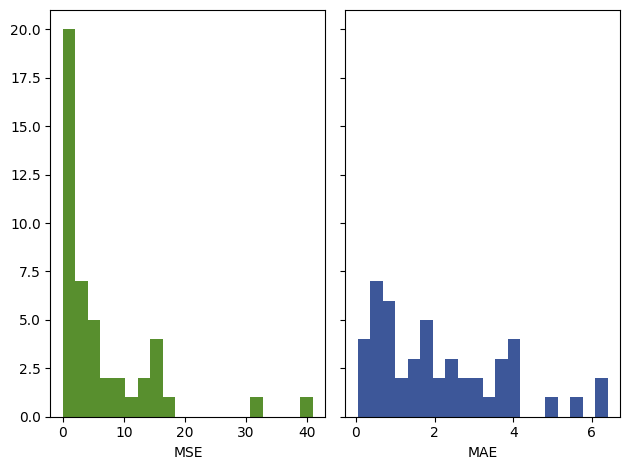

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_scores[:], bins=20,color='#588f2e')
axs[0].set_xlabel("MSE")
axs[1].hist(mae_scores[:], bins=20,color='#3d5799')
axs[1].set_xlabel("MAE")
plt.show()

6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

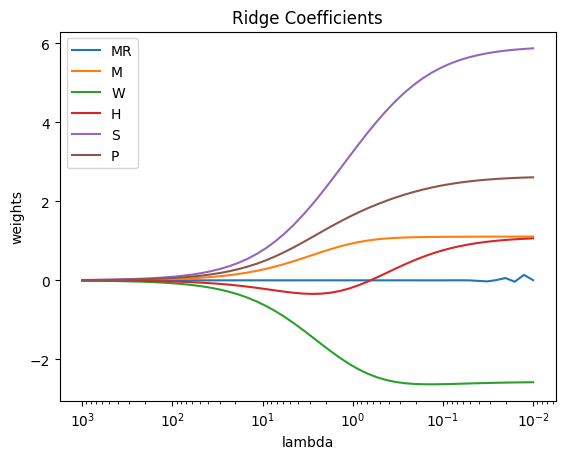

In [ ]:
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_model(X, y, lambd = 0.1, alpha = 0.0005, maxit = 100000):
  npredictors = X.shape[1]
  beta = 2*np.random.rand(npredictors) - 1.0
  it = 0
  while(np.linalg.norm(grad(X, y, beta, lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(X, y, beta, lambd)
    it = it + 1
  return beta

lambdas = np.logspace(-2, 3, 50)
coefs = []
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
for l in lambdas:
  beta = fit_model(X_normalized, Y, l)
  coefs.append(beta)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge Coefficients')
plt.axis('tight')
features = ['MR', 'M', 'W', 'H', 'S', 'P']
axis.legend(iter(lineObjects), features)

7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado).
* **¿Qué variables son más relevantes para el modelo?** En la grafica de Ridge, tenemos que las variables mas relevantes del modelo son 'S', 'P', 'M' y 'H' en respectivo orden de importancia.


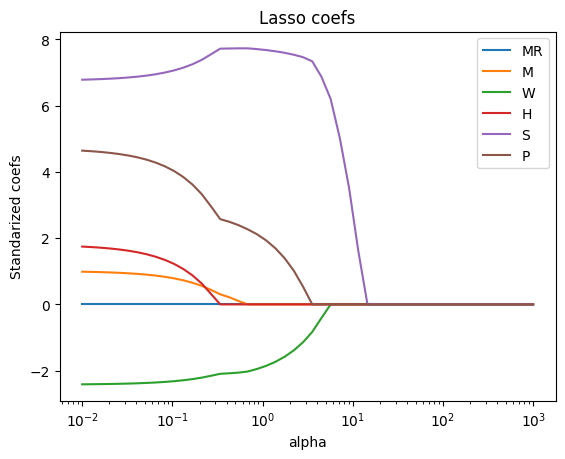

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X_normalized,Y,test_size=0.4,random_state=42)
alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()
lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['MR', 'M', 'W', 'H', 'S', 'P']
ax.legend(iter(lineObjects), features)

8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:
* **¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?** El modelo de regresion lineal es efectivo para modelar los datos problema porque ya que estamos buscando alguna relacion entre las variables de independientes y la variable dependientes. Ademas, los datos de ambos tipos de variables cumplen con linealidad y normalidad dentro de los datos, perfecto para realizazr regresion lineal.
* **¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada?** Si, la variabilidad que presenta R2 oscila entre 0 y 1, donde entre mas cercano a 1 significa que el modelo esta mejor ajustado. Mientras que con MSE y MAE son medidas de error que entre mas bajos sean sus valores, mejor sera el rendimiento del mismo modelo.
* **¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?** Yo considedaria que el modelo cuadratico ya que en R2, el modelo cuadratico no la evalua ya que el metodo es el de LOOCV y no el de Monte Carlo. La razon de esto es que el resultado del modelo lineal en respecto a R2 da un valor de: -1.20; este valor no tiene sentido ya que sobrepasas de 1 y se encuentra negativa, por lo que nos es un indicador de que el modelo lineal no es un modelo a tomar en cuenta para estos datos.
* **¿Qué variables son más relevantes para el modelo según Ride y Lasso?** Tanto en la grafica de Ridge como en Lasso, tenemos que las variables mas relevantes del modelo son 'S', 'P', 'M' y 'H' en respectivo orden de importancia. Curiosamente, la variable menos relevante del modelo fue 'W' quien representa a la gente blanca de manera porcentual.
* **¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?** En la grafica de Ridge, tanto las variables predictoras como la variable de respuesta parten del mismo valor y en la grafica de Lasso, tanto las variables predictoras como la varibale de respuesta terminan en el mismo valor: ambas en el valor 0 de los coeficientes estandarizados y peso respectivamente.



---


##Problema 2:
El conjunto de datos de esperanzas de vida (Life Expectancy (WHO) | KaggleLinks to an external site.) tiene el registro de la esperanza de vida de 193 países medida en diferentes años, junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad. El conjunto de datos se puede descargar aquí Download aquí. Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna ("Life expectancy"). A su vez, las variables independientes de interés son:

* X1 - Adult mortality
* X2 - Infant deaths
* X3 - Alcohol
* X4 - Percentage expenditure
* _**X5 - Hepatitis B**_
* X6 - Measles
* _**X7 - BMI**_
* X8 - Under-five deaths
* _**X9 - Polio**_
* X10 - Total expenditure
* X11 - Diphtheria
* X12 - HIV/AIDS   
* _**X13 - GDP**_
* X14 - Population
* X15 - Thinness  1-19 years
* X16 - Thinness 5-9 years
* _**X17 - Income composition of resources**_
* X18 - Schooling

0. Importamos librerias:

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression,  r_regression, SequentialFeatureSelector, RFE

0. Importamos los datos del problema en un DataFrame:

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


0. Dropeamos las columnas no relevantes:

In [ ]:
df.drop(['Hepatitis B', ' BMI ', 'Polio', 'GDP', 'Income composition of resources'], axis=1, inplace=True)
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Measles                     0
under-five deaths           0
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
Population                652
 thinness  1-19 years      34
 thinness 5-9 years        34
Schooling                 163
dtype: int64

0. Llenamos las categorias con datos nulos:

In [ ]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
columnas_media = df[columnas_numericas].mean()
df = df.fillna(columnas_media)
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Measles                   0
under-five deaths         0
Total expenditure         0
Diphtheria                0
 HIV/AIDS                 0
Population                0
 thinness  1-19 years     0
 thinness 5-9 years       0
Schooling                 0
dtype: int64

0. Obtenemos cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

In [ ]:
X = df.drop('Life expectancy ', axis=1)
Y = df['Life expectancy ']
print(X[:5])
print(Y[:5])

       Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Measles   under-five deaths   Total expenditure  \
0               71.279624      1154                  83               8.16   
1               73.523582       492                  86               8.18   
2               73.219243       430                  89               8.13   
3               78.184215      2787                  93               8.52   
4                7.097109      3013                  97               7.87   

   Diphtheria    HIV/AIDS  Population   thinness  1-19 years  \
0   

In [ ]:
label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Status'] = label_encoder.fit_transform(X['Status'])
X = np.array(X)
Y = np.array(Y)

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Scores de validación cruzada:", scores)
print("Score promedio:", scores.mean())

Scores de validación cruzada: [0.80731302 0.80159782 0.76512822 0.69041745 0.79017532]
Score promedio: 0.7709263650093809


2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [ ]:
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    fselectionCV = SelectKBest(r_regression, k=5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV = linear_model.LinearRegression()
    regrCV.fit(X_train, y_train)
    x_test = fselectionCV.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = regrCV.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 38.954046288158054  MAE promedio: 4.574306486019133  R^2 promedio: 0.5688076758770062


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        fselectionCV = SelectKBest(r_regression, k=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV = linear_model.LinearRegression()
        regrCV.fit(X_train, y_train)
        x_test = fselectionCV.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = regrCV.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 9


3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
# Paso 2:
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    regrCV = linear_model.LinearRegression()
    fselectionCV = SequentialFeatureSelector(regrCV, n_features_to_select=0.5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV.fit(X_train, y_train)
    X_test = fselectionCV.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = regrCV.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 19.198255943426265  MAE promedio: 3.2659176727349277  R^2 promedio: 0.7876158844634731


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        regrCV = linear_model.LinearRegression()
        fselectionCV = SequentialFeatureSelector(regrCV,n_features_to_select=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV.fit(X_train, y_train)
        X_test = fselectionCV.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = regrCV.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 8


4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
# Paso 2:
mseCV = []
maeCV = []
r2CV = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    regrCV = linear_model.LinearRegression()
    fselectionCV = RFE(regrCV, n_features_to_select=0.5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    regrCV.fit(X_train, y_train)
    X_test = fselectionCV.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = regrCV.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)
print('MSE promedio:', np.average(mseCV), ' MAE promedio:', np.average(maeCV), ' R^2 promedio:', np.average(r2CV))

MSE promedio: 23.643495314825206  MAE promedio: 3.7333566755007532  R^2 promedio: 0.7382284484907436


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat = []
maeNfeat = []
r2Nfeat = []
for n_feat in nFeats:
    mseCV = []
    maeCV = []
    r2CV = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        regrCV = linear_model.LinearRegression()
        fselectionCV = RFE(regrCV,n_features_to_select=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        regrCV.fit(X_train, y_train)
        X_test = fselectionCV.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = regrCV.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV.append(r2_i)
    mse = np.average(mseCV)
    mseNfeat.append(mse)
    mae = np.average(maeCV)
    maeNfeat.append(mae)
    r2 = np.average(r2CV)
    r2Nfeat.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 9


5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [ ]:
# Paso 1:
model = KNeighborsRegressor()
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Scores de validación cruzada con KNN (R2):", scores)
print("Score promedio (R2):", scores.mean())

Scores de validación cruzada con KNN (R2): [ 0.02928329 -0.20902545 -0.22460095 -0.0762775  -0.04693452]
Score promedio (R2): -0.10551102530415135


In [ ]:
# Paso 2:
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    fselectionCV = SelectKBest(f_regression, k=5)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)
    model_knn = KNeighborsRegressor()
    model_knn.fit(X_train, y_train)
    x_test = fselectionCV.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = model_knn.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 7.770984650405078  MAE promedio con KNN: 1.9078752921621813  R^2 promedio con KNN: 0.9139978421634982


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        fselectionCV = SelectKBest(f_regression, k=n_feat)
        fselectionCV.fit(X_train, y_train)
        X_train = fselectionCV.transform(X_train)
        model_knn = KNeighborsRegressor()
        model_knn.fit(X_train, y_train)
        x_test = fselectionCV.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = model_knn.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 9


In [ ]:
# Paso 3:
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    model_knn = KNeighborsRegressor()
    fselectionCV_knn = SequentialFeatureSelector(model_knn, n_features_to_select=0.5)
    fselectionCV_knn.fit(X_train, y_train)
    X_train = fselectionCV_knn.transform(X_train)
    model_knn.fit(X_train, y_train)
    X_test = fselectionCV_knn.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = model_knn.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 5.454025556075358  MAE promedio con KNN: 1.5660177933877306  R^2 promedio con KNN: 0.9398034476195283


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        model_knn = KNeighborsRegressor()
        fselectionCV_knn = SequentialFeatureSelector(model_knn, n_features_to_select=n_feat)
        fselectionCV_knn.fit(X_train, y_train)
        X_train = fselectionCV_knn.transform(X_train)
        model_knn.fit(X_train, y_train)
        X_test = fselectionCV_knn.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = model_knn.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 9


In [ ]:
# Paso 4:
mseCV_knn = []
maeCV_knn = []
r2CV_knn = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train = X[train_index, :]
    y_train = Y[train_index]
    model_knn = RandomForestRegressor()
    model_knn.fit(X_train, y_train)
    X_test = X[test_index, :]
    y_test = Y[test_index]
    y_pred = model_knn.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mseCV_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV_knn.append(r2_i)
print('MSE promedio con KNN:', np.average(mseCV_knn), ' MAE promedio con KNN:', np.average(maeCV_knn), ' R^2 promedio con KNN:', np.average(r2CV_knn))

MSE promedio con KNN: 3.2956123213783455  MAE promedio con KNN: 1.1173527701784582  R^2 promedio con KNN: 0.963491058994722


In [ ]:
nFeats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mseNfeat_knn = []
maeNfeat_knn = []
r2Nfeat_knn = []
for n_feat in nFeats:
    mseCV_knn = []
    maeCV_knn = []
    r2CV_knn = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index, :]
        y_train = Y[train_index]
        model_knn = RandomForestRegressor()
        fselectionCV_knn = RFE(model_knn, n_features_to_select=n_feat)
        fselectionCV_knn.fit(X_train, y_train)
        X_train = fselectionCV_knn.transform(X_train)
        model_knn.fit(X_train, y_train)
        X_test = fselectionCV_knn.transform(X[test_index, :])
        y_test = Y[test_index]
        y_pred = model_knn.predict(X_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mseCV_knn.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        maeCV_knn.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2CV_knn.append(r2_i)
    mse = np.average(mseCV_knn)
    mseNfeat_knn.append(mse)
    mae = np.average(maeCV_knn)
    maeNfeat_knn.append(mae)
    r2 = np.average(r2CV_knn)
    r2Nfeat_knn.append(r2)
optimal_n_feat = nFeats[np.argmin(mseNfeat)]
print("Número óptimo de características:", optimal_n_feat)

Número óptimo de características: 9


6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [ ]:
X = df.drop('Life expectancy ', axis=1)
X['Status'] = df['Status']

label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Status'] = label_encoder.fit_transform(X['Status'])
X = np.array(X)
model = DecisionTreeRegressor()
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Scores de validación cruzada (R2):", scores)
print("Score promedio (R2):", scores.mean())

Scores de validación cruzada (R2): [0.83450998 0.75337539 0.82622058 0.82296074 0.85533974]
Score promedio (R2): 0.8184812858663939


7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:
* **Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?** Si, considero que el modelo de regresion lineal se adecua a los datos evaluados en este problema. Los puntajes obtenidos en R2 promedio son buenos (0.70 y 0.80 respectivamente). Sin embargo, los puntajes de R2 en validaccion cruzada suelen ser muy variables llegando a valores maximos de 0.84 hasta minimos de 0.69.
* **¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?** El metodo Wrapper o de seleccion de caracteristicas ssecuencialse utiliza 9 caracteristicaas para tener una prediccion mas constante de R2 promedio y en validacion cruzada, que a mi parecer, me gusta tener un buen puntaje y que sea constante a comparacion de un mejor puntaje pero a coste de no siempre tener dicho puntaje de forma homogenea en diferentes casos de prueba.
* **Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?** Puedo decir que las categorias de 'VIH/SIDA', 'Diphtheria', 'Under-five deaths', 'Total expenditure' y 'Percentage expenditure' estan muy correlacionadas con la esperanza de vida reflejada en una mortalidad alta, mientras que 'Status' y 'Country' tienen una correlacion con la esperanza de vida reflejada en una mortalidad baja.
* **¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?** Yo digo que ambos modelos ayudaron a reflejar diferentes perspectivas de os datos, si la tarea hubiese tenido el proposito de identificar ciertos resultados, un modelo hubiese sido mejor en cuanto a funcionalidad en comparacion contra el otro. Lo que si puedo decir es que para mi, fue mas relevante el modelo no lineal (modelo KNN), ya que los datos tienen una relacion no lineal entre las que son categoricas y las que son numericas.
* **¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?** Definitivamente, esto denoto varios aspectos como un mejor rendimiento en el modelo de regresion, una gran correlacion entre la variable 'Status' y el 'Country', donde podemos concluir que dependiendo en donde se vive y el estatus socioeconomico esta correlacionado directamete con la esperanza de vida en los datos.
* **¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.** Considero que probar diferentes tipos de modelos en estos datos ayuda a realmente reflejar como los datos tienen una gran correlacion lineal con la esperanza de vida, mientras que los demas modelos (como el KNN por ejemplo) ayudaron a denotar la variabilidad que existe entre las mismas variables y la categoria 'Status', reflejando como esta misma aumenta significativamente la esperanza de vida y la variabilidad en torno a esta categoria.